In [1]:
from data_generation import run_all
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
N = int(input("Number of samples (N): "))
M = int(input("Number of SNPs (M): "))
C = int(input("Number of covariates (C): "))
P = int(input("Number of parties (P): "))
B = int(input("Number of blocks (B): "))
print(f'Generating Data for {N} samples, {M} SNPs, {C} covariates, {P} computational nodes and {B} blocks')

run_all(N, M, C, P, B)


Generating Data for 10000 samples, 15000 SNPs, 10 covariates, 4 computational nodes and 2 blocks
Generated Z
Generated y
Generated X
Done


In [2]:
BPR=B
!./ppgwas.sh 8000 {N} {M} {C} {P} {B} 5 {BPR}
# make BPR small if RAM is insufficient

Launching server on port 8000 (logs → logs/ppgwas_20250623_143851/server)
Spawning 4 clients (logs → logs/ppgwas_20250623_143851/clients)
All processes finished. Logs in logs/ppgwas_20250623_143851


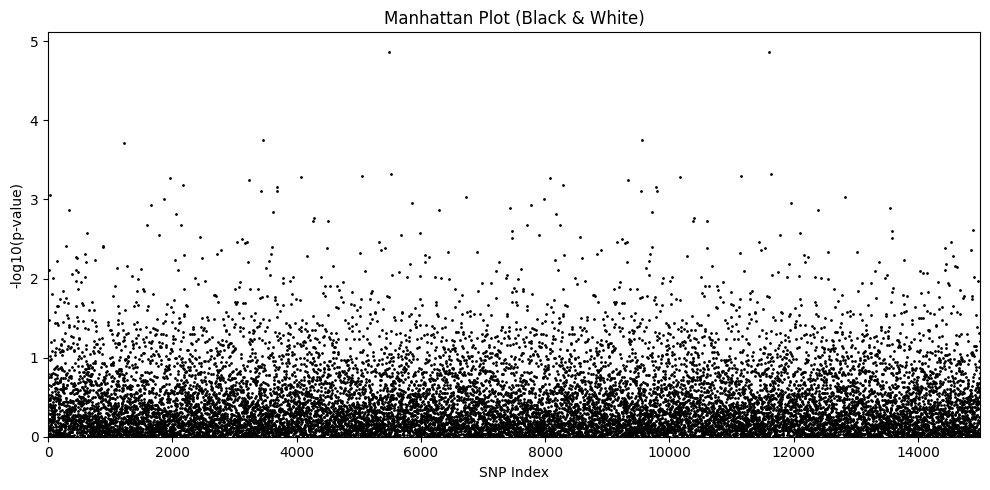

In [4]:
import numpy as np
import matplotlib.pyplot as plt

file_path = f"Data/N{N}_M{M}_C{C}_P{P}_B{B}/neg_log_transfer.npy"
neg_log_p = np.load(file_path)
positions = np.arange(len(neg_log_p))

plt.figure(figsize=(10, 5))
plt.scatter(positions, neg_log_p, s=1, c='k')
plt.xlim(0, M)
plt.ylim(bottom=0)
plt.xlabel("SNP Index")
plt.ylabel("-log10(p-value)")
plt.title("Manhattan Plot (Black & White)")
plt.tight_layout()
plt.show()